## Definition of Input Variables

- age - Age of the client- (numeric)

- job - Client’s occupation - (categorical)
(admin, bluecollar, entrepreneur, housemaid, management, retired, selfemployed, services, student, technician, unemployed, unknown)

- marital - Client’s marital status - (categorical)
(divorced, married, single, unknown, note: divorced means divorced or widowed)

- education - Client’s education level - (categorical)
(basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)

- default - Indicates if the client has credit in default - (categorical)
(no, yes, unknown)

- housing - Does the client as a housing loan? - (categorical)
(no, yes, unknown)

- loan - Does the client as a personal loan? - (categorical)
(no, yes, unknown’)

- contact - Type of communication contact - (categorical)
(cellular, telephone)

- month - Month of last contact with client - (categorical)
(January - December)

- day_of_week - Day of last contact with client - (categorical)
(Monday - Friday)

- duration - Duration of last contact with client, in seconds - (numeric)

- campaign - Number of client contacts during this campaign - (numeric)
(includes last contact)

- pdays - Number of days from last contacted from a previous campaign - (numeric)
(999 means client was not previously contacted)

- previous - Number of client contacts performed before this campaign - (numeric)

- poutcome - Previous marketing campaign outcome - (categorical)
(failure, nonexistent , success)

- emp.var.rate - Quarterly employment variation rate - (numeric)

- cons.price.idx - Monthly consumer price index - (numeric)

- cons.conf.idx - Monthly consumer confidence index - (numeric)

- euribor3m - Daily euribor 3 month rate - (numeric)

- nr.employed - Quarterly number of employees - (numeric)

- Output variable (desired target) - Term Deposit - subscription verified
(binary: ‘yes’,‘no’)

##  Imports

In [1]:
#Data Storage and Manipulation Libraries
import pandas as pd
import numpy as np

# !pip3 install sklearn

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

#models
from sklearn.linear_model import LogisticRegression

#metrics
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix


#Visualization Libraries
# !pip3 install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

## Dataset Path

In [2]:
path= "/home/nikhil/Downloads/bank-additional/bank-additional/bank-additional-full.csv"

## Read the Data

In [3]:
data= pd.read_csv(path, sep=';')

## EDA

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
print("Shape of the dataset:", data.shape)

Shape of the dataset: (41188, 21)


In [6]:
print("Columns of the dataset:", data.columns)

Columns of the dataset: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


## Datatypes of all features and target variable

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [8]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Check for null values
- No Null Values 

In [9]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Univariate Analysis

## Count plots for all Categorical Variables

##  Education

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

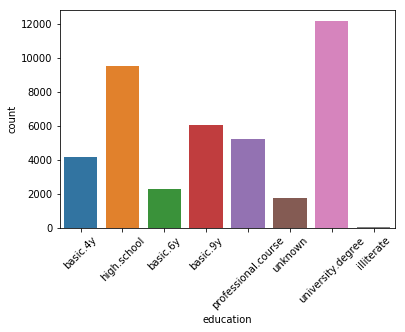

In [10]:
sns.countplot(x='education', data= data)
plt.xticks(rotation=45)

## Job

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

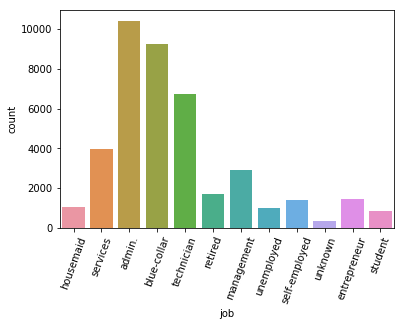

In [11]:
sns.countplot(x='job', data= data)
plt.xticks(rotation=70)

## Housing

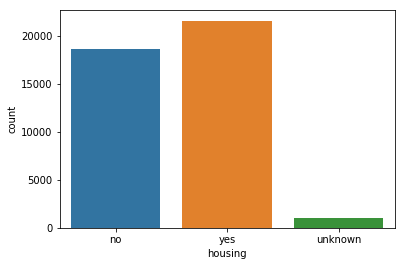

In [12]:
sns.countplot(x='housing', data= data)

## Default

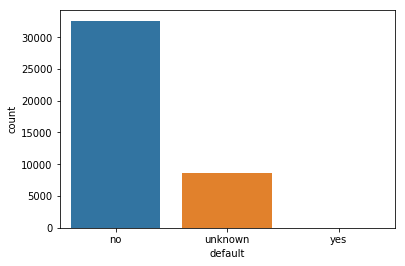

In [13]:
sns.countplot(x='default', data= data)

## Loan

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

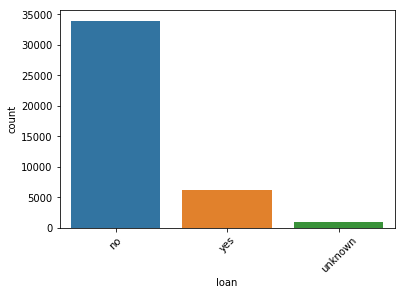

In [14]:
sns.countplot(x='loan', data= data)
plt.xticks(rotation=45)

## Contact

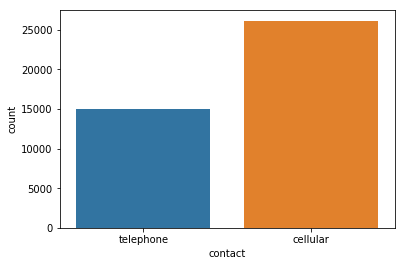

In [15]:
sns.countplot(x='contact', data= data)

## Month

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

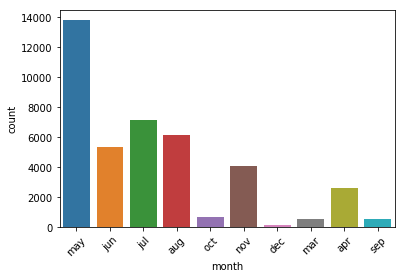

In [16]:
sns.countplot(x='month', data= data)
plt.xticks(rotation=45)

## Day of the Week

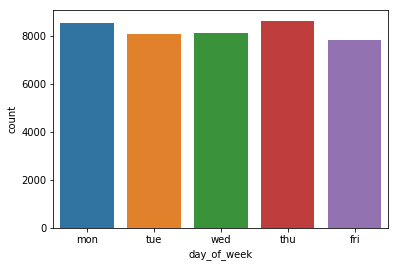

In [17]:
sns.countplot(x='day_of_week', data= data)

## Marital Status

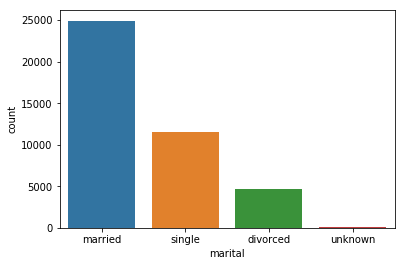

In [18]:
sns.countplot(x='marital', data= data)

## Histograms for numeric features

## Age

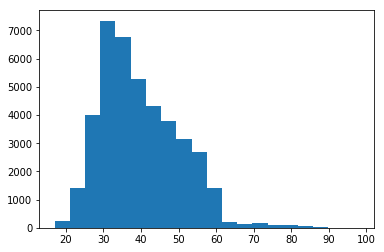

In [19]:
plt.hist(data['age'], bins=20)
plt.show()

## Duration

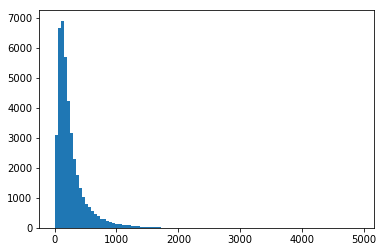

In [20]:
plt.hist(data['duration'], bins=100)
plt.show()

## Countplot for the target variable
- Shows a huge class imbalance which has to be tackled

(array([0, 1]), <a list of 2 Text xticklabel objects>)

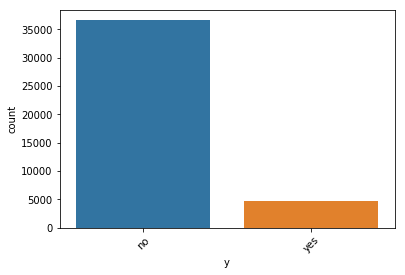

In [21]:
sns.countplot(x='y', data= data)
plt.xticks(rotation=45)

## Implementing a Baseline model
- NO Outlier removal
- NO feature engineering
- NO feature selection
- Class Imbalance has not been tackled

- Converting all categorical variables to One-Hot-Encoding with dummy columns 


## Dividing the data into features and target variable

In [22]:
X= data.iloc[:, :-1]
y= data.iloc[:, -1]

## Make a dictionary from the features

In [23]:
# X_dict is a list of dicts where 1 dict= 1 data-point
X_dict = X.to_dict(orient='records')
X_dict[0]

{'age': 56,
 'campaign': 1,
 'cons.conf.idx': -36.4,
 'cons.price.idx': 93.994,
 'contact': 'telephone',
 'day_of_week': 'mon',
 'default': 'no',
 'duration': 261,
 'education': 'basic.4y',
 'emp.var.rate': 1.1,
 'euribor3m': 4.857,
 'housing': 'no',
 'job': 'housemaid',
 'loan': 'no',
 'marital': 'married',
 'month': 'may',
 'nr.employed': 5191.0,
 'pdays': 999,
 'poutcome': 'nonexistent',
 'previous': 0}

In [24]:
# instantiate a Dictvectorizer object for X
dv_X = DictVectorizer(sparse=False)

In [25]:
# apply dv_X on X_dict
X_encoded = dv_X.fit_transform(X_dict)
X_encoded

array([[ 56. ,   1. , -36.4, ...,   1. ,   0. ,   0. ],
       [ 57. ,   1. , -36.4, ...,   1. ,   0. ,   0. ],
       [ 37. ,   1. , -36.4, ...,   1. ,   0. ,   0. ],
       ...,
       [ 56. ,   2. , -50.8, ...,   1. ,   0. ,   0. ],
       [ 44. ,   1. , -50.8, ...,   1. ,   0. ,   0. ],
       [ 74. ,   3. , -50.8, ...,   0. ,   0. ,   1. ]])

In [27]:
# Get dummy columns
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)

# Converting target column to numeric representation
y= y.map(dict(yes=1, no=0))

In [31]:
print("Shape of X:", X.shape)
X.head()

Shape of X: (41188, 53)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [32]:
y= pd.DataFrame(y)
y.tail()

,y
41183,1
41184,0
41185,0
41186,1
41187,0


## Dividing the dataset into training and testing data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Using Logistic regression model as a baseline

In [34]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/nikhil/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nikhil/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Testing the trained model 
- Accuracy is a bad metric since we have a class imbalance in the data
- Use ROC_AUC instead 

In [35]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


## Confusion matrix

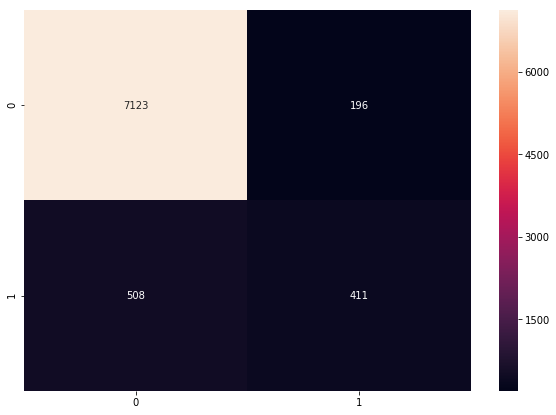

In [36]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## Classification Report

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['no', 'yes']))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7319
         yes       0.68      0.45      0.54       919

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.81      0.71      0.75      8238
weighted avg       0.90      0.91      0.91      8238



## ROC_AUC score

In [40]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

AUC: 0.71


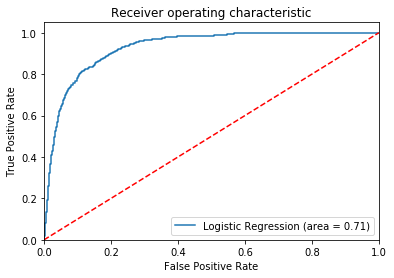

In [41]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()